# Build an Autoencoders deep neural network model 


In [1]:
import tensorflow as tf


In [3]:
import keras


In [4]:
keras.__version__

'2.15.0'

In [10]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import Model
from keras.layers import Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=10,6
RANDOM_SEED=42
LABELS=['Severity','Non Severity']

In [11]:

#load the data
df=pd.read_csv('Diseases (1).csv')
df.head()


,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity,Non Severity
0,1,1,1,1,0,0
1,1,1,1,1,0,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0


In [12]:
df.shape

(316800, 6)

# Checking the missing values

In [13]:

df.isnull().values.any()


False

In [14]:
df.isna().sum().sum()

0

In [38]:
xtrain,xtest=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)


In [41]:
ytrain,ytest=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)

# Class


Text(0, 0.5, 'Frequency')

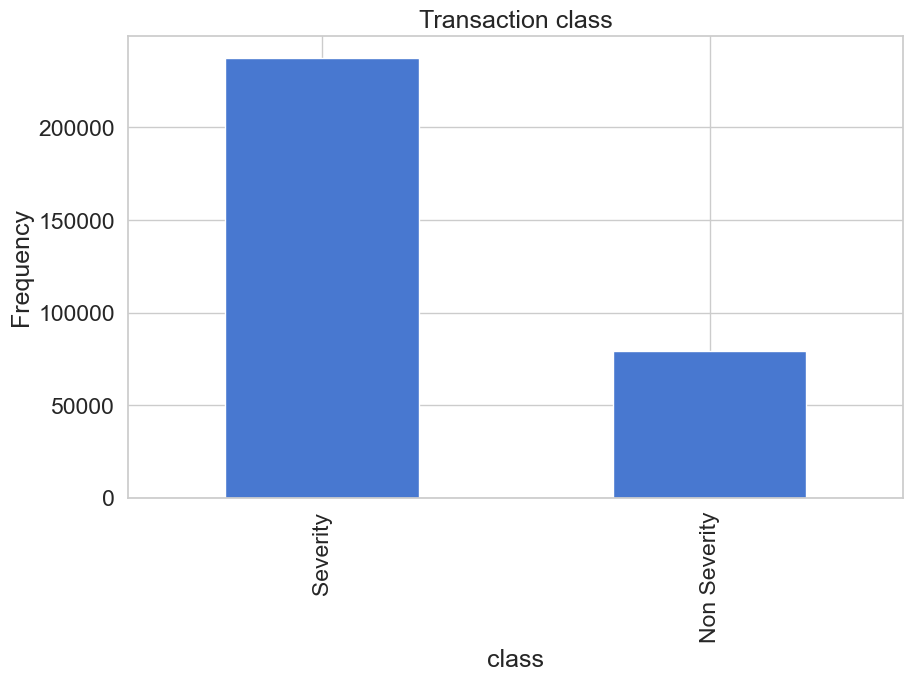

In [80]:
count_classes=pd.value_counts(df['Severity'],sort=True)
count_classes.plot(kind='bar')
plt.title('Transaction class')
plt.xticks(range(2),LABELS)
plt.xlabel('class')
plt.ylabel('Frequency')

<Axes: ylabel='count'>

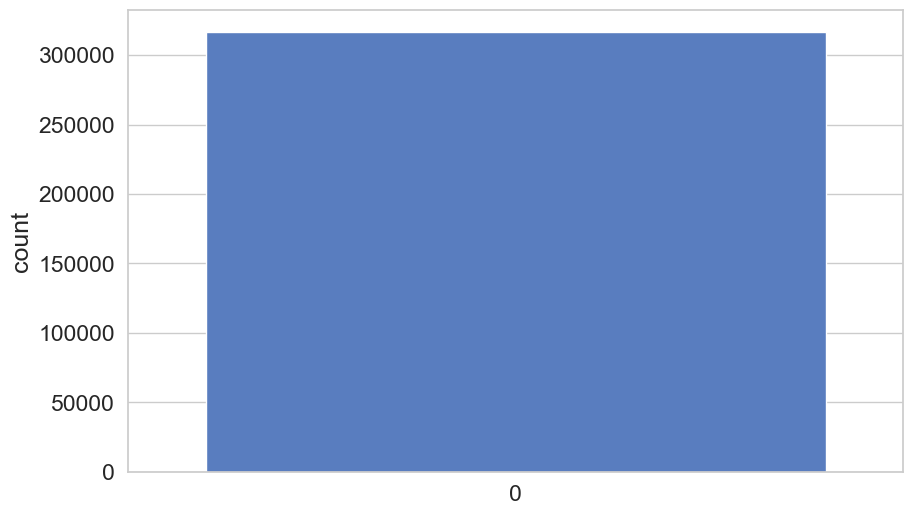

In [81]:
sns.countplot(df['Severity'])

# It can be observed that the data is highly
imbalanced

In [84]:
Severity=df[df.Severity==1]
NonSeverity=df[df.Severity==0]

In [85]:
Severity.shape


(79200, 6)

In [86]:
NonSeverity.shape


(237600, 6)

# Stats  info of the fradualnt transaction

In [88]:
Severity.Amount.describe()

AttributeError: 'DataFrame' object has no attribute 'Amount'

In [89]:

normal.Amount.describe()

AttributeError: 'DataFrame' object has no attribute 'Amount'

# Building Autoencoder Model

In [25]:
input_dim=xtrain.shape[1]
encoding_dim=14

In [26]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation='tanh',
 activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder=Dense(input_dim,activation='relu')(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)

In [27]:
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 14)                98        
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
Total params: 307 (1.20 KB)
Trainable params: 307 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the Model:


In [28]:
nb_epoch=30
batch_size=32
autoencoder.compile(optimizer='adam',
 loss='mean_squared_error',
metrics=['accuracy'])
checkpointer=ModelCheckpoint(filepath='model_ae.h5',
 verbose=0,
save_best_only=True)
tensorboard=TensorBoard(log_dir='./logs',
 histogram_freq=0,
write_graph=True,
write_images=True)
history=autoencoder.fit(xtrain,xtrain,
 epochs=nb_epoch,
batch_size=batch_size,
shuffle=True,
validation_data=(xtest,xtest),
 verbose=1,
callbacks=[checkpointer,tensorboard]).history



Epoch 1/30

7920/7920 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.5790

E:\sushmita\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7920/7920 [==============================] - 40s 5ms/step - loss: 0.0062 - accuracy: 0.5790 - val_loss: 1.9733e-04 - val_accuracy: 0.6332
Epoch 2/30
7920/7920 [==============================] - 35s 4ms/step - loss: 1.2254e-04 - accuracy: 0.6089 - val_loss: 7.5036e-05 - val_accuracy: 0.4667
Epoch 3/30
7920/7920 [==============================] - 35s 4ms/step - loss: 6.4840e-05 - accuracy: 0.5905 - val_loss: 5.0355e-05 - val_accuracy: 0.5515
Epoch 4/30
7920/7920 [==============================] - 34s 4ms/step - loss: 4.9836e-05 - accuracy: 0.5861 - val_loss: 4.0009e-05 - val_accuracy: 0.4905
Epoch 5/30
7920/7920 [==============================] - 36s 5ms/step - loss: 4.2143e-05 - accuracy: 0.5857 - val_loss: 3.3958e-05 - val_accuracy: 0.5570
Epoch 6/30
7920/7920 [==============================] - 35s 4ms/step - loss: 3.8189e-05 - accuracy: 0.5804 - val_loss: 3.9312e-05 - val_accuracy: 0.4940
Epoch 7/30
7920/7920 [==============================] - 35s 4ms/step - loss: 3.6644e-05 - accurac

In [30]:
from keras.models import load_model
autoencoder=load_model('model_ae.h5')

# Evaluation

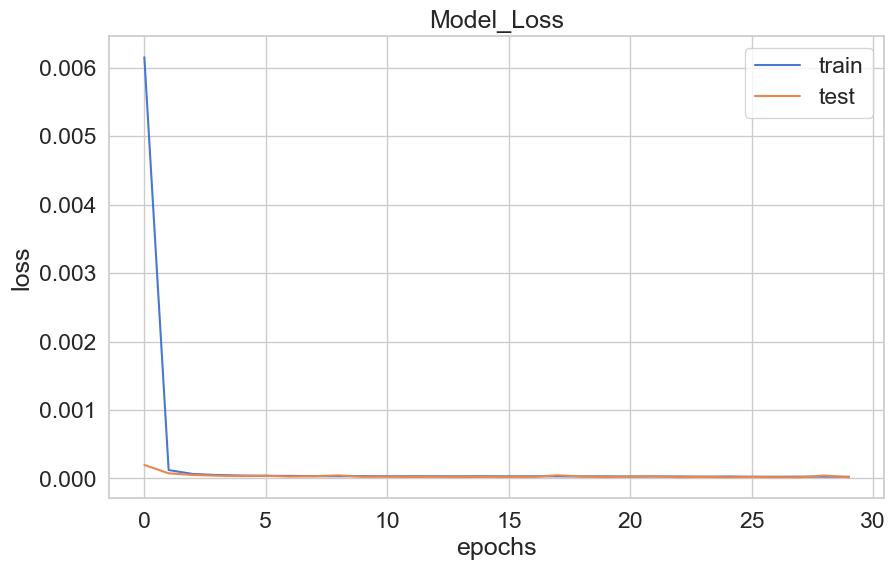

In [31]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')


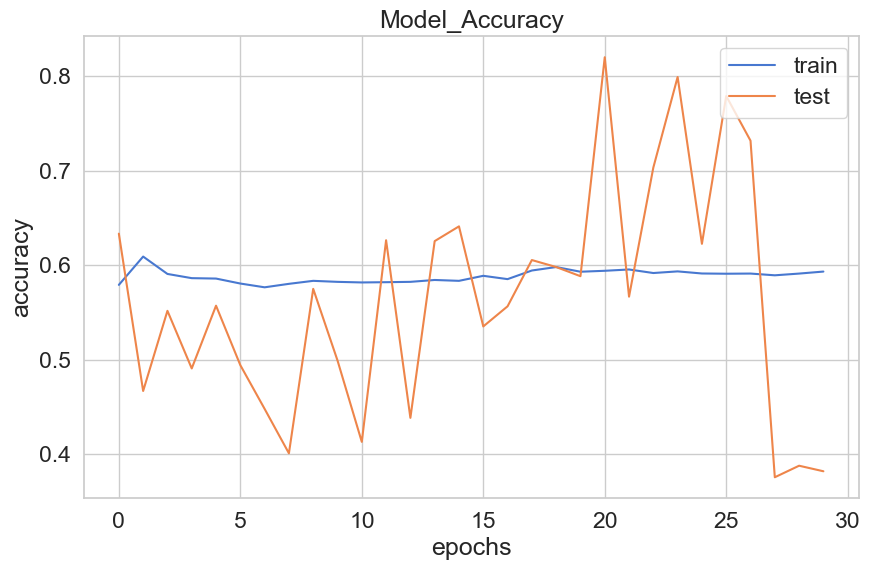

In [32]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')


In [33]:
predictions=autoencoder.predict(xtest)

1980/1980 [==============================] - 5s 2ms/step


In [43]:
ytrain,ytest=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)

In [49]:
# Assuming you have a DataFrame 'df' with a column 'true_class' containing your class labels
y = df['Severity'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42  # Replace with your desired random seed
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Severity', axis=1), y, test_size=0.2, random_state=RANDOM_SEED)

In [54]:
# Assuming you have this line in your code
error_df = pd.DataFrame({'Reconstruction_error': mse, 'Severity': ytest})

# Now you can use error_df
print(error_df)

        Reconstruction_error  Severity
277936          2.467074e-06         1
193502          3.605363e-06         0
92446           4.522443e-07         0
117607          6.543041e-08         0
240924          3.788277e-07         0
...                      ...       ...
122340          4.156135e-08         0
151370          6.543041e-08         0
288434          3.605363e-06         0
1619            2.530780e-06         0
68501           1.905423e-06         1

[63360 rows x 2 columns]


In [59]:
error_df

,Reconstruction_error,Severity
277936,2.467074e-06,1
193502,3.605363e-06,0
92446,4.522443e-07,0
117607,6.543041e-08,0
240924,3.788277e-07,0
...,...,...
122340,4.156135e-08,0
151370,6.543041e-08,0
288434,3.605363e-06,0
1619,2.530780e-06,0


In [55]:
error_df.describe()

,Reconstruction_error,Severity
count,6.336000e+04,63360.000000
mean,1.481202e-06,0.251089
std,2.241038e-06,0.433643
min,0.000000e+00,0.000000
25%,8.772297e-08,0.000000
50%,3.950593e-07,0.000000
75%,2.467074e-06,1.000000
max,1.347452e-05,1.000000


# Reconstruction error without fraud

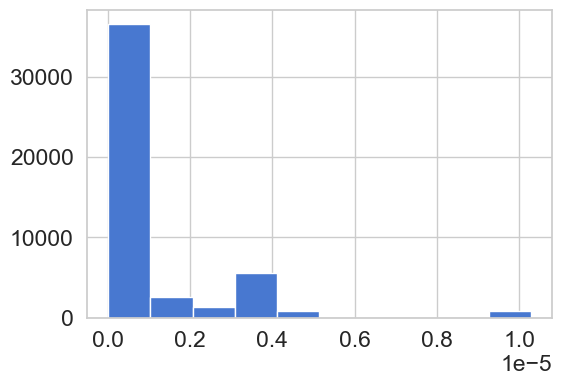

In [60]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
normal_error_df=error_df[(error_df['Severity']==0) & (error_df['Reconstruction_error']<100)]
_=ax.hist(normal_error_df.Reconstruction_error.values,bins=10)

# Reconstruction error with severnity

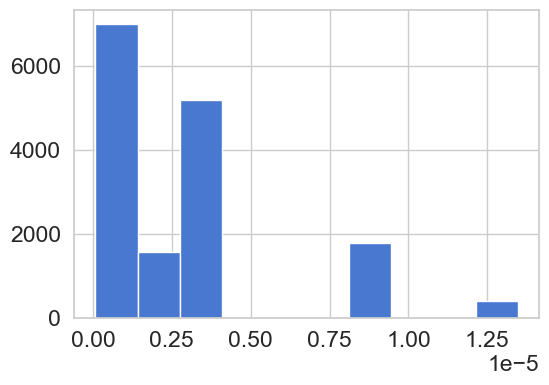

In [61]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
fraud_error_df=error_df[(error_df['Severity']==1)]
_=ax.hist(fraud_error_df.Reconstruction_error.values,bins=10)


In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,auc,roc_curve,recall_score,f1_score
from sklearn.metrics import precision_recall_fscore_support

# ROC


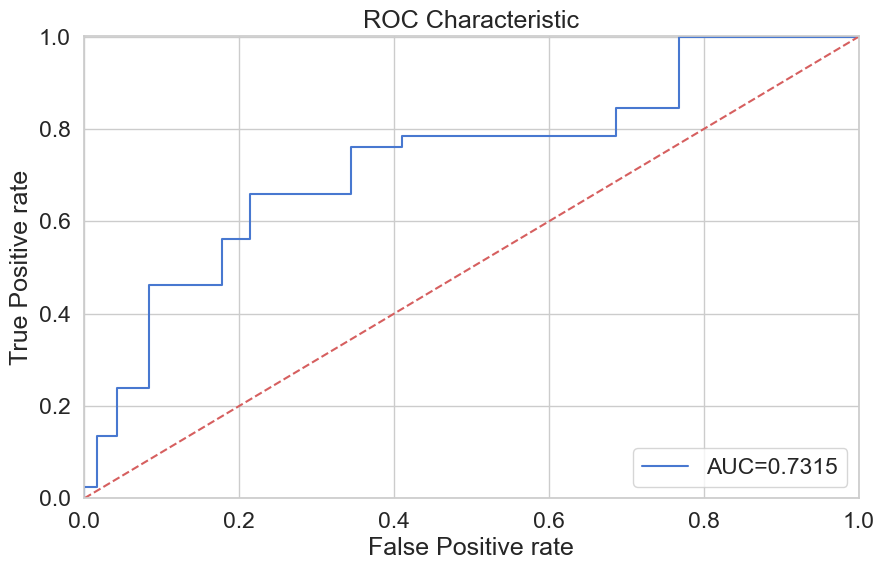

In [65]:
fpr,tpr,thresholds=roc_curve(error_df.Severity,error_df.Reconstruction_error)
roc_auc=auc(fpr,tpr)
plt.title('ROC Characteristic')
plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

# Recall Vs Precision

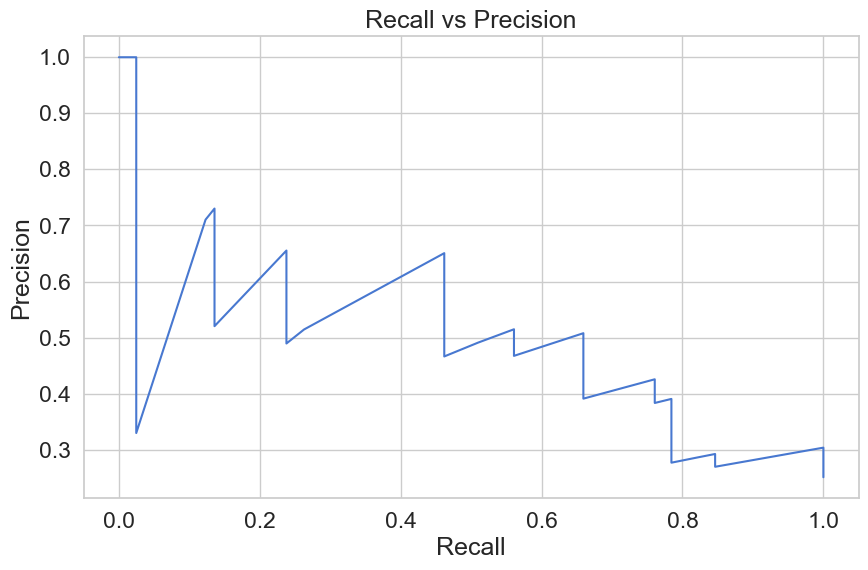

In [69]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(recall,precision,'b',label='precision-recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# Precision vs threshold

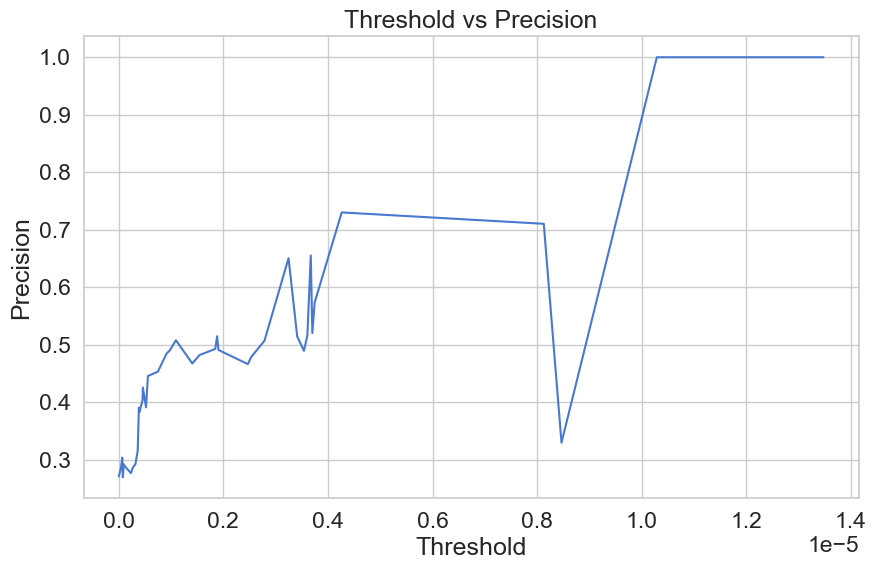

In [72]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(th,precision[1:],'b',label='Threshold-precision curve')
plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

# Reconstruction_Error Vs Recall


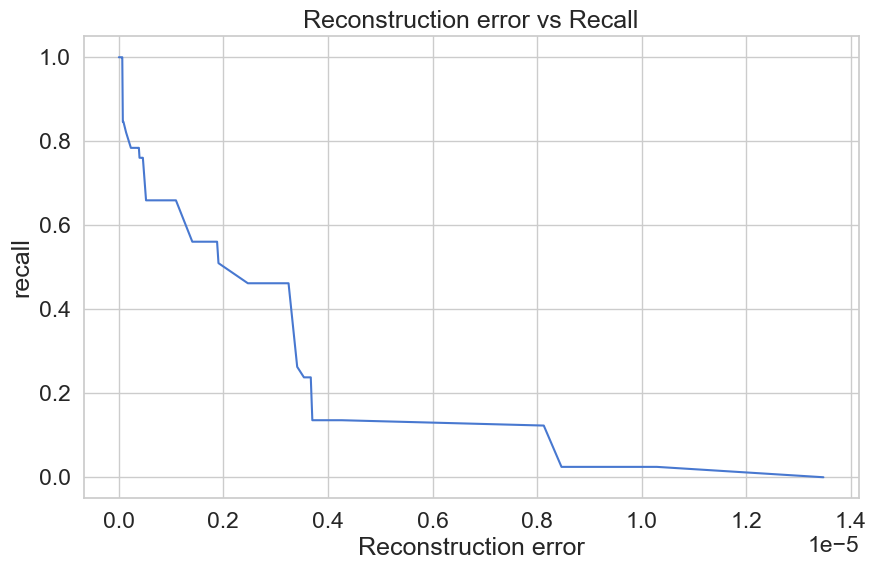

In [74]:
plt.plot(th,recall[1:],'b',label='Threshold-recall curve')
plt.title('Reconstruction error vs Recall')
plt.xlabel('Reconstruction error')
plt.ylabel('recall')
plt.show()

# Prediction

In [73]:
threshold=2.9


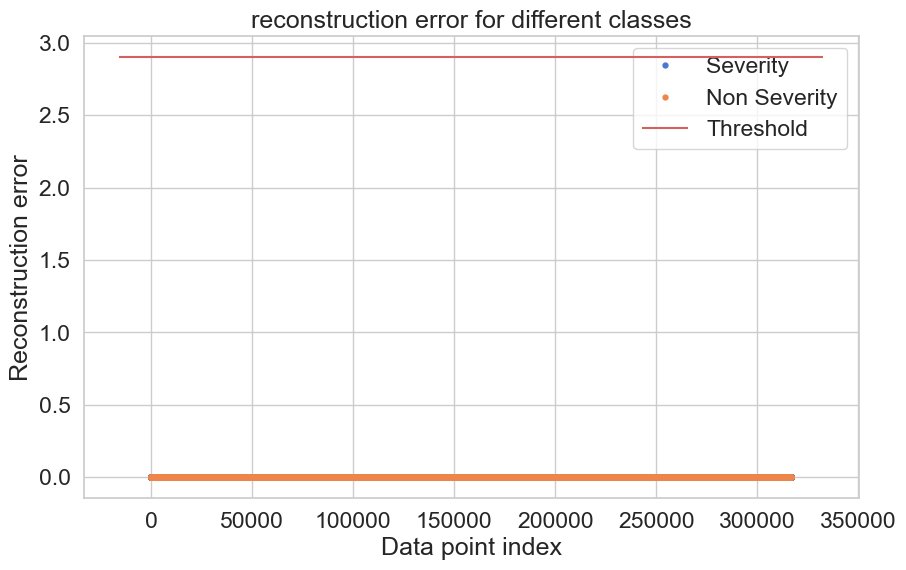

In [77]:
groups=error_df.groupby('Severity')
fig,ax=plt.subplots()
for name,group in groups:
 ax.plot(group.index,group.Reconstruction_error,marker='o',ms=3.5,linestyle='',
 label='Non Severity' if name ==1 else 'Severity')
ax.hlines(threshold,ax.get_xlim()[0],ax.get_xlim()[1],colors='r',zorder=100,label='Threshold')
ax.legend()
plt.title('reconstruction error for different classes')
plt.xlabel('Data point index')
plt.ylabel('Reconstruction error')
plt.show()


# Confusion Matrix

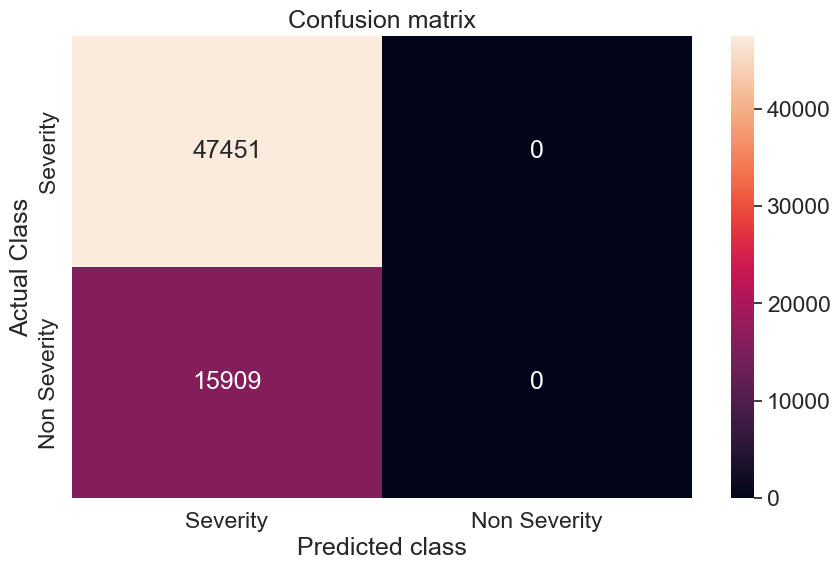

In [78]:
ypred=[1 if e>threshold else 0 for e in error_df.Reconstruction_error.values]
conf_matrix=confusion_matrix(error_df.Severity,ypred)
sns.heatmap(conf_matrix,annot=True,xticklabels=LABELS,yticklabels=LABELS,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('Actual Class')
plt.show()
